# Newral Network with the MNIST dataset (no tensorflow or pandas)

In [28]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [29]:
data = pd.read_csv('/kaggle/input/mnist-digit-recognizer/train.csv')

### The data matrix has shape (n_examples, 784): each row is a flattened image (784 pixel features). Transposing the matrix yields shape (784, n_examples), where each row now represents one pixel across every example and each column is an example.

## We will build a newral network to predict a digit from 0 to 9 given an image 

In [30]:


#Prepare the data for training 
data=np.array(data)

#m is the amount of examples we have and n is the amount of features
m,n = data.shape
np.random.shuffle(data)

data_dev=data[0:1000].T
#we transpose it so each column is an example 
y_dev =data_dev[0]
x_dev = data_dev[1:n]

data_train= data[1000:m].T
y_train = data_train[0]
x_train = data_train[1:n]
x_train = x_train / 255
_,m_train = x_train.shape


In [31]:
#Weight and bias parameters
def init_params():
    W1 = np.random.rand(10, 784) - 0.5
    b1 = np.random.rand(10, 1) - 0.5
    W2 = np.random.rand(10, 10) - 0.5
    b2 = np.random.rand(10, 1) - 0.5
    return W1, b1, W2, b2

def ReLU(Z):
    return np.maximum(Z, 0)

def softmax(Z):
    return np.exp(Z) / sum(np.exp(Z))
    
    
def for_prop(W1, b1, W2, b2, X):
    Z1 = W1.dot(X) + b1
    A1 = ReLU(Z1)
    Z2 = W2.dot(A1) + b2
    A2 = softmax(Z2)
    return Z1, A1, Z2, A2
#One hot encoding 

def ReLU_deriv(Z):
    return Z > 0 #if one element in z is grater than 0 then we get 1 and if not we get 0


def one_hot(Y):
    one_hot_Y = np.zeros((Y.size, Y.max() + 1)) #Create an array matrix of 0s 
    one_hot_Y[np.arange(Y.size), Y ]=1 #For each row go to the Y column and set it to 1 
    one_hot_Y=one_hot_Y.T
    return one_hot_Y

    

#Back Propagation
def back_prop(Z1, A1, Z2, A2, W1, W2, X, Y):
    one_hot_Y = one_hot(Y)
    dZ2 = A2 - one_hot_Y
    dW2 = 1 / m * dZ2.dot(A1.T)
    db2 = 1 / m * np.sum(dZ2)
    dZ1 = W2.T.dot(dZ2) * ReLU_deriv(Z1)
    dW1 = 1 / m * dZ1.dot(X.T)
    db1 = 1 / m * np.sum(dZ1)
    return dW1, db1, dW2, db2

def update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha):
    W1 = W1 - alpha * dW1
    b1 = b1 - alpha * db1    
    W2 = W2 - alpha * dW2  
    b2 = b2 - alpha * db2    
    return W1, b1, W2, b2

In [32]:
def get_predictions(A2):
    return np.argmax(A2, 0)

def get_accuracy(predictions, Y):
    print(predictions, Y)
    return np.sum(predictions == Y) / Y.size


def gradient_descent(X, Y, alpha, iterations):
    W1, b1, W2, b2 = init_params()
    for i in range(iterations):
        Z1, A1, Z2, A2 = for_prop(W1, b1, W2, b2, X)
        dW1, db1, dW2, db2 = back_prop(Z1, A1, Z2, A2, W1, W2, X, Y)
        W1, b1, W2, b2 = update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha)
        if i % 10 == 0:
            print("Iteration: ", i)
            predictions = get_predictions(A2)
            print(get_accuracy(predictions, Y))
    return W1, b1, W2, b2

In [33]:
W1, b1, W2, b2 = gradient_descent(x_train, y_train, 0.10, 500)

Iteration:  0
[0 2 2 ... 2 0 2] [2 5 0 ... 8 7 2]
0.10258536585365853
Iteration:  10
[0 6 1 ... 0 0 7] [2 5 0 ... 8 7 2]
0.17348780487804877
Iteration:  20
[0 3 1 ... 6 0 7] [2 5 0 ... 8 7 2]
0.2911463414634146
Iteration:  30
[0 3 1 ... 6 7 7] [2 5 0 ... 8 7 2]
0.37114634146341463
Iteration:  40
[0 3 1 ... 6 7 2] [2 5 0 ... 8 7 2]
0.44802439024390245
Iteration:  50
[0 3 1 ... 6 7 2] [2 5 0 ... 8 7 2]
0.5096829268292683
Iteration:  60
[0 3 0 ... 4 7 2] [2 5 0 ... 8 7 2]
0.5539512195121952
Iteration:  70
[0 3 0 ... 4 7 2] [2 5 0 ... 8 7 2]
0.5857560975609756
Iteration:  80
[0 3 0 ... 4 7 2] [2 5 0 ... 8 7 2]
0.6122439024390244
Iteration:  90
[0 3 0 ... 4 7 2] [2 5 0 ... 8 7 2]
0.6358292682926829
Iteration:  100
[0 8 0 ... 4 7 2] [2 5 0 ... 8 7 2]
0.6565609756097561
Iteration:  110
[0 8 0 ... 4 7 2] [2 5 0 ... 8 7 2]
0.6732926829268293
Iteration:  120
[0 3 0 ... 4 7 2] [2 5 0 ... 8 7 2]
0.6884878048780487
Iteration:  130
[0 3 0 ... 4 7 2] [2 5 0 ... 8 7 2]
0.7022439024390243
Iteration:  1

Prediction:  [2]
Label:  2


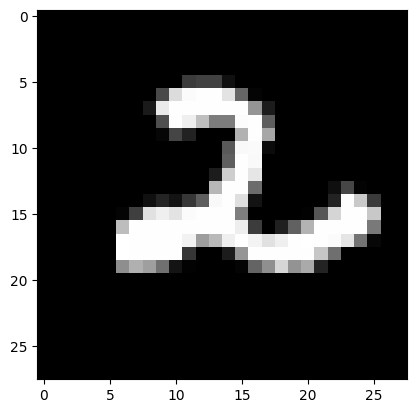

Prediction:  [5]
Label:  5


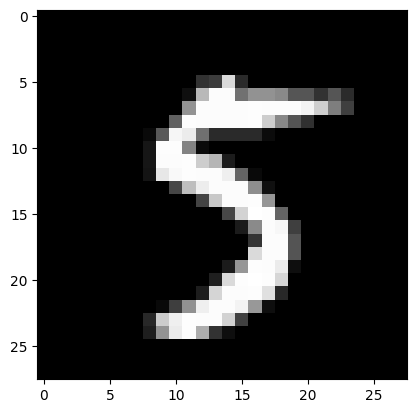

Prediction:  [0]
Label:  0


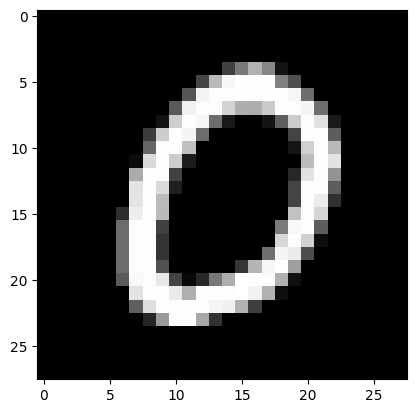

Prediction:  [5]
Label:  5


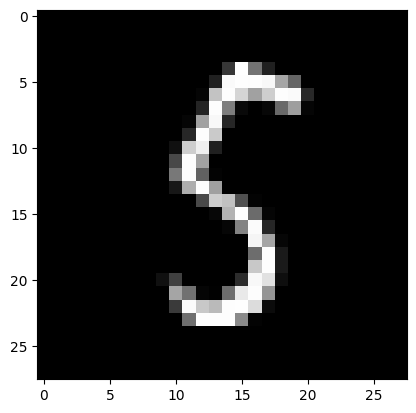

In [36]:
def make_predictions(X, W1, b1, W2, b2):
    _, _, _, A2 = for_prop(W1, b1, W2, b2, X)
    predictions = get_predictions(A2)
    return predictions

def test_prediction(index, W1, b1, W2, b2):
    current_image = x_train[:, index, None]
    prediction = make_predictions(x_train[:, index, None], W1, b1, W2, b2)
    label = y_train[index]
    print("Prediction: ", prediction)
    print("Label: ", label)
    
    current_image = current_image.reshape((28, 28)) * 255
    plt.gray()
    plt.imshow(current_image, interpolation='nearest')
    plt.show()
    
test_prediction(0, W1, b1, W2, b2)
test_prediction(1, W1, b1, W2, b2)
test_prediction(78, W1, b1, W2, b2)
test_prediction(784, W1, b1, W2, b2)